<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/Neural_Network_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Import the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Creatures features and labels

In [ ]:
X = insurance.drop("charges", axis=1)

y = insurance["charges"]
X.head(5), y.head(5)

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest, 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

# Preprocessing data (normalization & standardization)

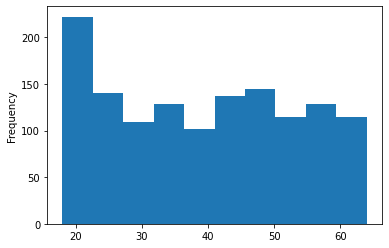

In [ ]:
X["age"].plot(kind="hist")

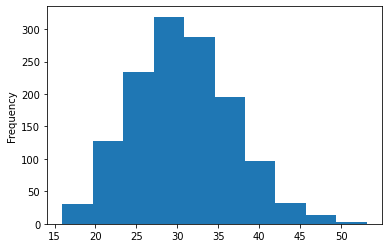

In [ ]:
X["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06cc08f190>,
      dtype=object)

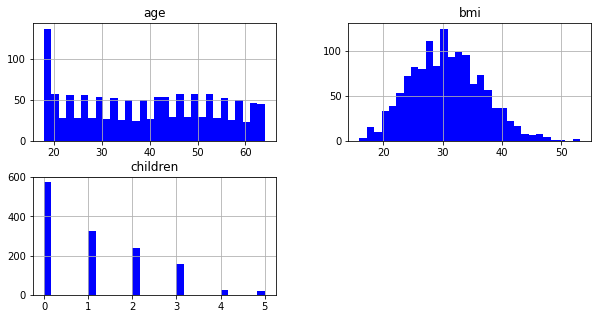

In [ ]:
# Plot graph to see the data distribution
X.hist(bins=30, figsize=(10,5), color="b")

# Import classes from scikitlearn to normalize the data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) 
)

# Create Training and Test set

In [ ]:
# Import TrainTest split for scikitlearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [ ]:
# Use the column transformer to transform the data

X_train = ct.fit_transform(X_train)

X_test = ct.transform(X_test)

In [ ]:
X_train[0], y_train[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), 16884.924)

In [ ]:
X_train.shape

(1070, 11)

# Create a Neural Network Model

In [ ]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

# 3. Fit the model
history = insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [ ]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# Check the central tendency of the data
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Model summary
insurance_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


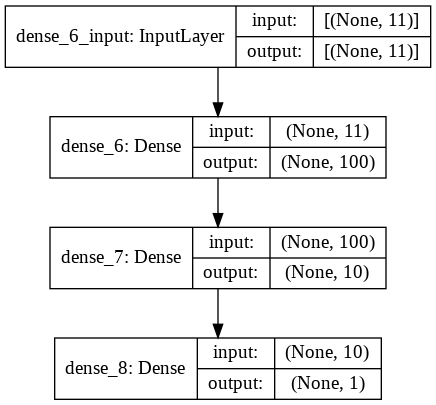

In [ ]:
# Check the model graphically
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_model, show_shapes=True, show_layer_names=True)

# Evaluate the model

In [ ]:
# Prediction of the model
y_pred = insurance_model.predict(X_test)

In [ ]:
y_pred.ndim, y_test.ndim

(2, 1)

In [ ]:
# Check the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Check the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3438.7844>,
 <tf.Tensor: shape=(), dtype=float32, numpy=41750904.0>)

# Visualize the model history or the loss curve

Text(0, 0.5, 'Loss')

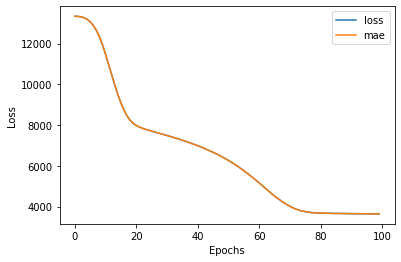

In [ ]:
pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 1

In [ ]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Import the dataset
insurance_1 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Create features and labels
X_1 = insurance_1.drop("charges", axis=1)

# Labels
y_1 = insurance_1["charges"]
X_1.shape, y_1.shape, type(X_1), type(y_1)

((1338, 6), (1338,), pandas.core.frame.DataFrame, pandas.core.series.Series)

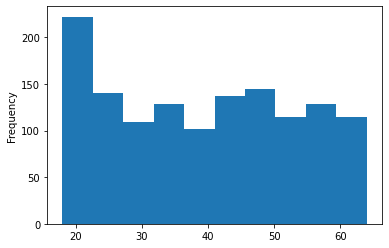

In [ ]:
# Preprocessing the normalization and standardization

X_1["age"].plot(kind="hist") # See the distribution of the data

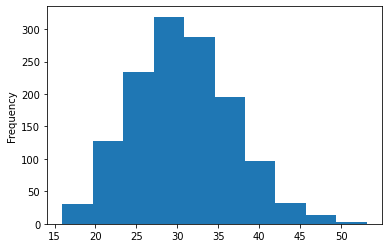

In [ ]:
X_1["bmi"].plot(kind="hist") # See the distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7e3cc950>,
      dtype=object)

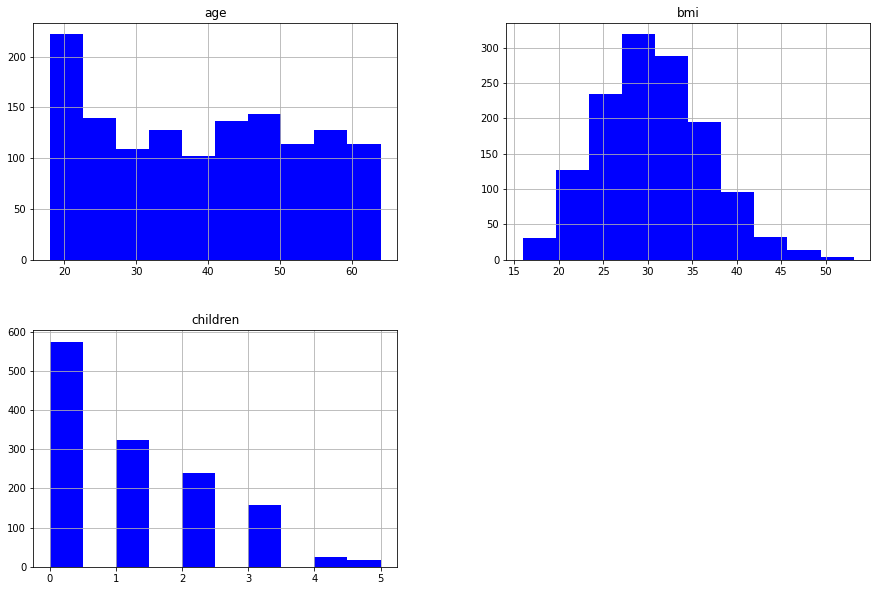

In [ ]:
# Plot the graph to see the data distribution
X_1.hist(bins=10, figsize=(15,10), color="b")

In [ ]:
# Import classes from scikitlearn 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

In [ ]:
# Create the Train and Test split
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1, test_size=0.2, random_state=42)
X_1_train.shape, X_1_test.shape, y_1_train.shape, y_1_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# Use Column transformer to transform the data
X_1_train = ct.fit_transform(X_1_train)

X_1_test = ct.transform(X_1_test)

In [ ]:
# Build a neural network model
tf.random.set_seed(42)

# 1. Create a model
insurance_model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_1.fit(X_1_train, y_1_train, epochs=100, verbose=0)

# Evaluate the model
insurance_model_1.evaluate(X_1_test, y_1_test)

9/9 [==============================] - 0s 3ms/step - loss: 3176.3691 - mae: 3176.3691


[3176.369140625, 3176.369140625]

In [ ]:
# Check the central tendency
y_1_train.median(), y_1_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Check the model summary
insurance_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


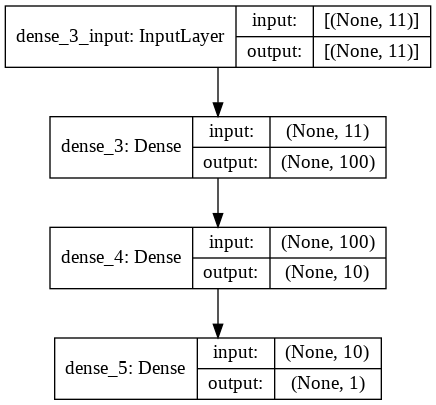

In [ ]:
# Graphically show the model summary
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_model_1, show_shapes=True, show_layer_names=True)

In [ ]:
# Predict the model
y_pred_1 = insurance_model_1.predict(X_1_test)

In [ ]:
y_1_test.ndim, y_pred_1.ndim

(1, 2)

In [ ]:
# Check the mean absolute errror
mae1 = tf.keras.metrics.mean_absolute_error(y_1_test, tf.squeeze(y_pred_1))

# Check the mean squared error
mse1 = tf.keras.metrics.mean_squared_error(y_1_test, tf.squeeze(y_pred_1))

mae1.numpy(), mse1.numpy()

(3176.3691, 43043020.0)

Text(0, 0.5, 'Loss')

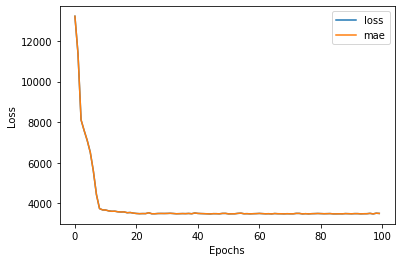

In [ ]:
# Visualize the model history or the loss curve

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 2

In [ ]:
# Import important packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Import the dataset
insurance_2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Create features and labels
X_2 = insurance_2.drop("charges", axis=1)
y_2 = insurance_2["charges"]
X_2.shape, y_2.shape

((1338, 6), (1338,))

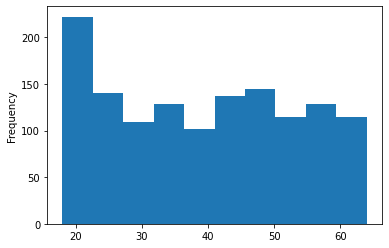

In [ ]:
# Preprocessing the data(normalization & standardization)
X_2["age"].plot(kind="hist")

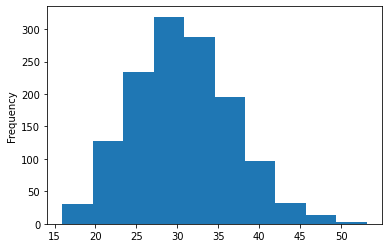

In [ ]:
X_2["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa642dceb50>,
      dtype=object)

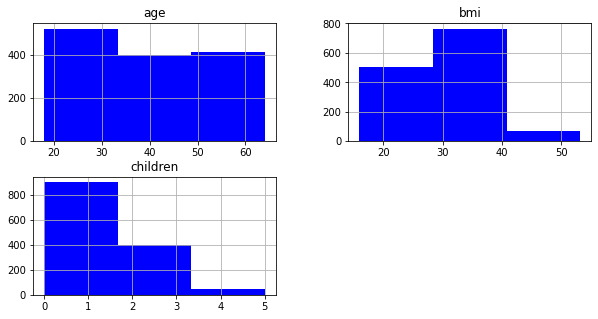

In [ ]:
X_2.hist(bins=3, figsize=(10,5), color="b")

In [ ]:
# Import classes from scikitlearn to preprocess the data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
# Create Train Test split
from sklearn.model_selection import train_test_split

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size=0.2, random_state=42)

X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# Use Column Transformer to transform the data
X_2_train = ct.fit_transform(X_2_train)

X_2_test = ct.transform(X_2_test)
X_2_train.ndim, X_2_test.ndim

(2, 2)

In [ ]:
# Build the neural network
tf.random.set_seed(42)

# 1. Create the neural network
insurance_2_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

# 2. Compile the model
insurance_2_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_2_model.fit(X_2_train, y_2_train, epochs=500, verbose=0)

# Evaluate the model
insurance_2_model.evaluate(X_2_test, y_2_test)

9/9 [==============================] - 0s 1ms/step - loss: 3160.4460 - mae: 3160.4460


[3160.446044921875, 3160.446044921875]

In [ ]:
# Check the central tendency
y_2_train.median(), y_2_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Check the model summary
insurance_2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


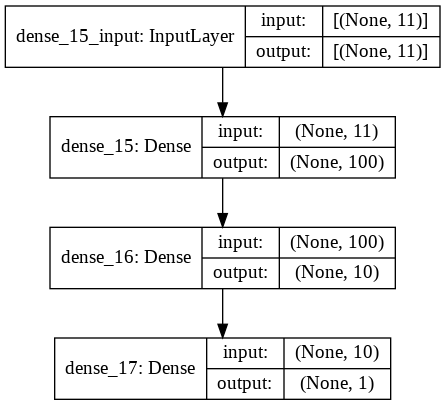

In [ ]:
# Check the model summary graphically
from tensorflow.keras.utils import plot_model

plot_model(insurance_2_model, show_shapes=True, show_layer_names=True)

In [ ]:
# Predict the model
y_pred_2 = insurance_2_model.predict(X_2_test)

In [ ]:
y_2_test.ndim, y_pred_2.ndim

(1, 2)

In [ ]:
# Check the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_2_test, tf.squeeze(y_pred_2))

# Check the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_2_test, tf.squeeze(y_pred_2))

mae.numpy(), mse.numpy()

(3160.446, 43189936.0)

Text(0, 0.5, 'Loss')

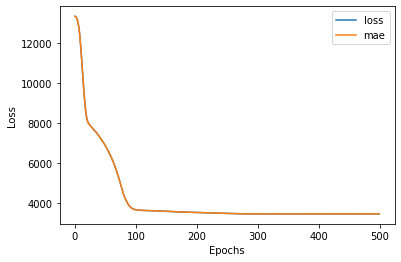

In [ ]:
# Visualize the history of the model loss curve

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 3

In [ ]:
# Import important packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Import the dataset
insurance_3 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_3.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Create features and labels
X_3 = insurance_3.drop("charges", axis=1)

# Label
y_3 = insurance_3["charges"]
X_3.shape, y_3.shape

((1338, 6), (1338,))

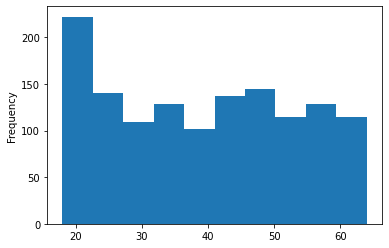

In [ ]:
# Preprocessing the data(normalization and standardization)
X_3["age"].plot(kind="hist")

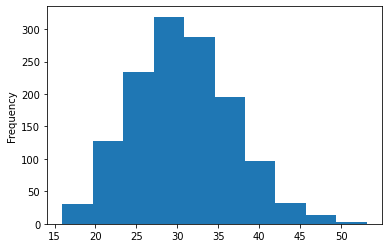

In [ ]:
X_3["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac63ca5050>,
      dtype=object)

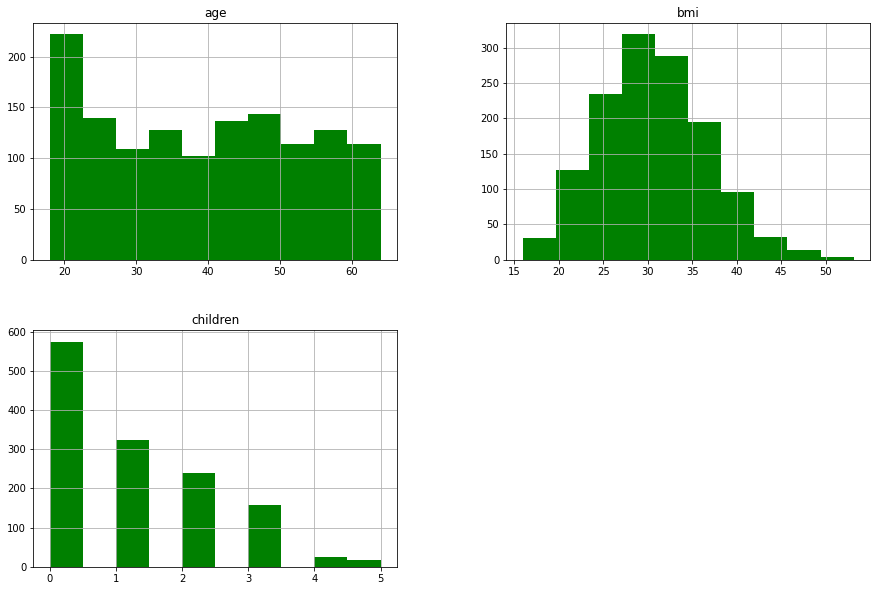

In [ ]:
X_3.hist(bins=10, figsize=(15,10), color="g")

In [ ]:
# Import classes from scikitlearn for data preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

In [ ]:
# Create Train & Test Split
from sklearn.model_selection import train_test_split

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3,y_3, test_size=0.2, random_state=42)

In [ ]:
# Use column transformer for preprocessing for feature scaling and Onehot encoding
X_3_train = ct.fit_transform(X_3_train)

X_3_test = ct.transform(X_3_test)
X_3_train.shape, X_3_test.shape

((1070, 11), (268, 11))

In [ ]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create a model
insurance_3_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_3_model.compile(loss=tf.keras.losses.mean_absolute_error,
                          optimizer= tf.keras.optimizers.Adam(learning_rate=0.002),
                          metrics=["mae"])

# 3. fit the model
history = insurance_3_model.fit(X_3_train,y_3_train, epochs=500, verbose=0)

# Evaluate the model
insurance_3_model.evaluate(X_3_test, y_3_test)

9/9 [==============================] - 0s 5ms/step - loss: 3174.4106 - mae: 3174.4106


[3174.41064453125, 3174.41064453125]

In [ ]:
# Check the central tendency
y_3_train.median(), y_3_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Check the model summary
insurance_3_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


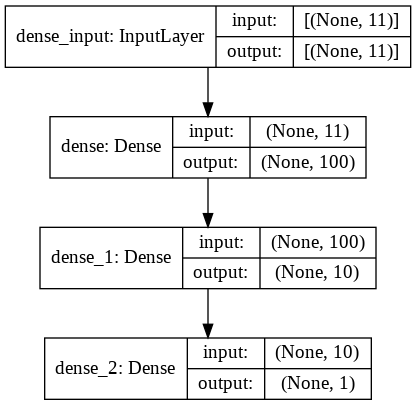

In [ ]:
# Check the modle summary graphically
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_3_model, show_shapes=True, show_layer_names=True)

In [ ]:
# Make predictions of the model
y_3_pred = insurance_3_model.predict(X_3_test)

In [ ]:
y_3_test.ndim, y_3_pred.ndim

(1, 2)

In [ ]:
# Check the mean absolute error
mae3 = tf.keras.metrics.mean_absolute_error(y_3_test, tf.squeeze(y_3_pred))

# Check the mean squared error

mse3 = tf.keras.metrics.mean_squared_error(y_3_test, tf.squeeze(y_3_pred))

mae3.numpy(), mse3.numpy()

(3174.411, 43380150.0)

Text(0, 0.5, 'Loss')

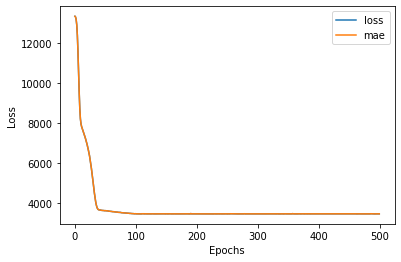

In [ ]:
# Visualize the history of the loss curve of the model

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 4

In [ ]:
# Import important packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Import dataset
insurance_4 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Create features and labels
X_4 = insurance_4.drop("charges", axis=1)

# Label
y_4 = insurance_4["charges"]
X_4.shape, y_4.shape

((1338, 6), (1338,))

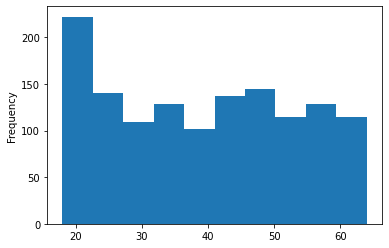

In [ ]:
# Preprocessing the data(normalization and standardization)
X_4["age"].plot(kind="hist")

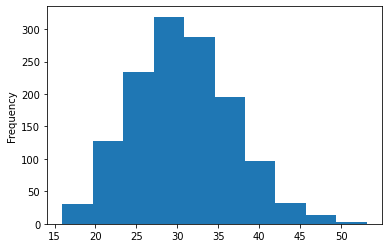

In [ ]:
X_4["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4a6909a10>,
      dtype=object)

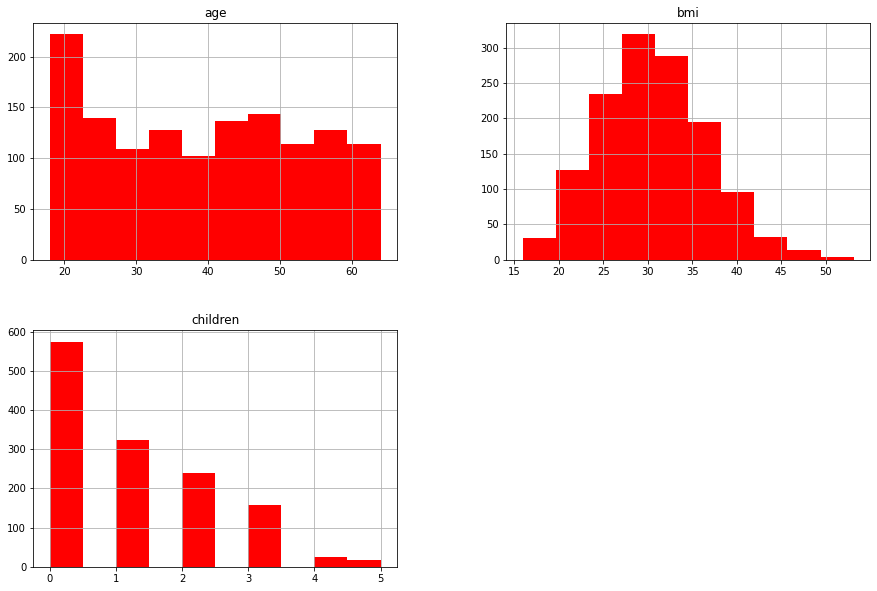

In [ ]:
X_4.hist(bins=10, figsize=(15,10), color="r")

In [ ]:
# Import classes from scikitlearn for data preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

In [ ]:
# Create the Train & Test Split
from sklearn.model_selection import train_test_split

X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
X_4_train.shape, X_4_test.shape, y_4_train.shape, y_4_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# Use column transformer for feature scaling and one hot encoding
X_4_train = ct.fit_transform(X_4_train)

X_4_test = ct.transform(X_4_test)
X_4_train.shape, X_4_test.shape, X_4_train.ndim, X_4_test.ndim

((1070, 11), (268, 11), 2, 2)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_4_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_4_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_4_model.fit(X_4_train, y_4_train, epochs=500,verbose=0)

# Evaluate the model
insurance_4_model.evaluate(X_4_test, y_4_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.4460 - mae: 3160.4460


[3160.446044921875, 3160.446044921875]

In [ ]:
# Check the central tendency
y_4_train.median(), y_4_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Check the summary of the model
insurance_4_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


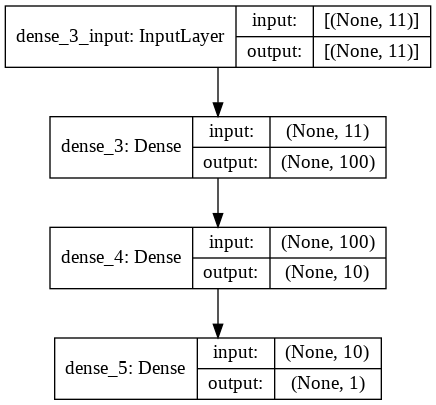

In [ ]:
# See the model graphically
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_4_model, show_shapes=True, show_layer_names=True)

In [ ]:
# Make prediction of the model
y_4_pred = insurance_4_model.predict(X_4_test)

In [ ]:
y_4_test.ndim, y_4_pred.ndim

(1, 2)

In [ ]:
# Check the mean absolute error
mae4 = tf.keras.metrics.mean_absolute_error(y_4_test, tf.squeeze(y_4_pred))

# Check the mean squared error
mse4 = tf.keras.metrics.mean_squared_error(y_4_test, tf.squeeze(y_4_pred))

mae4.numpy(), mse4.numpy()

(3160.446, 43189932.0)

Text(0, 0.5, 'Loss')

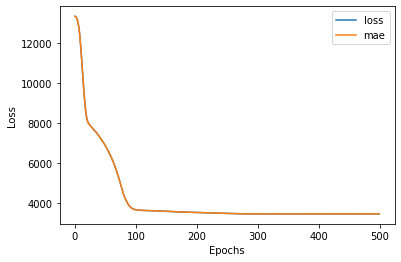

In [ ]:
# Visualize the history of the training the loss curve

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 5

In [2]:
# Import Important libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Import the dataset
insurance_5 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_5.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Create features and labels
X_5 = insurance_5.drop("charges", axis=1)

# Labels
y_5 = insurance_5["charges"]
X_5.shape, y_5.shape

((1338, 6), (1338,))

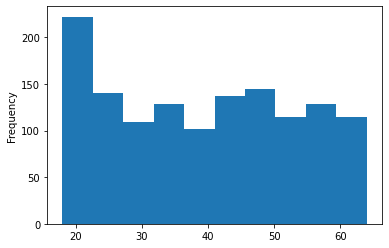

In [8]:
# Preprocessing the data( normalization and standardization)
X_5["age"].plot(kind="hist")

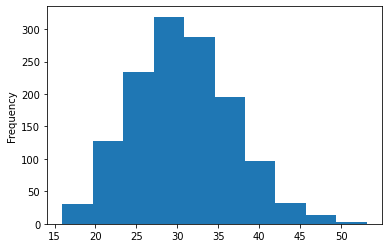

In [9]:
X_5["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc195209110>,
      dtype=object)

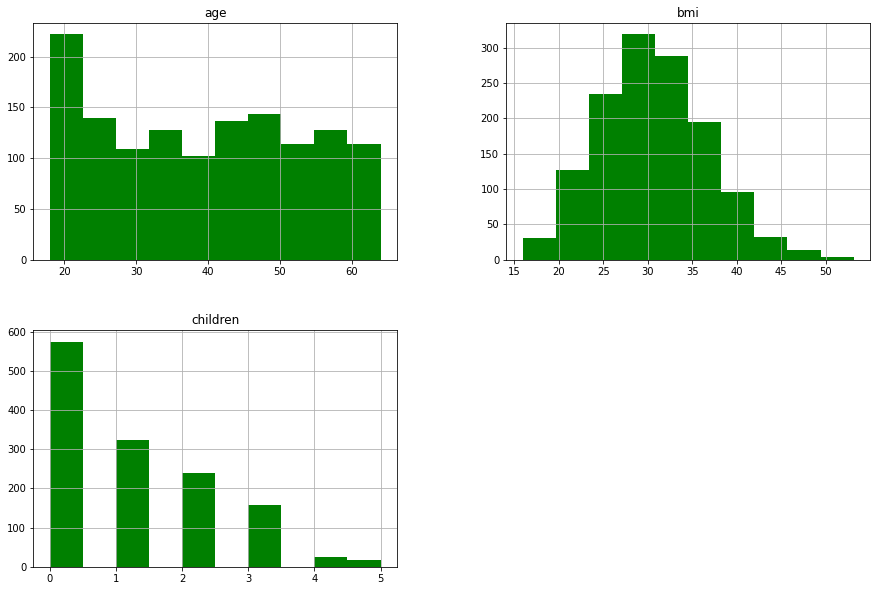

In [11]:
X_5.hist(bins=10, figsize=(15,10), color="g")

In [15]:
X_5.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [16]:
# Import classes from scikitlearn to preprocess the data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

In [27]:
# Create Train & Test split
from sklearn.model_selection import train_test_split

X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.2, )
X_5_train.shape, X_5_test.shape, y_5_train.shape, y_5_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [28]:
X_5_train = ct.fit_transform(X_5_train)

X_5_test = ct.transform(X_5_test)

X_5_train.shape, X_5_test.shape, X_5_train.ndim, X_5_test.ndim

((1070, 11), (268, 11), 2, 2)

In [38]:
# Build a nueral network

# 1. Create a neural network
insurance_5_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_5_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_5_model.fit(X_5_train,y_5_train, epochs=700, verbose=0)

# Evaluate the model
insurance_5_model.evaluate(X_5_test,y_5_test)

9/9 [==============================] - 0s 2ms/step - loss: 3669.3074 - mae: 3669.3074


[3669.307373046875, 3669.307373046875]

In [40]:
# Check the central tendency
y_5_train.median(), y_5_train.mean()

(9273.6388, 13163.070085925221)

In [41]:
# Check the summary of the model
insurance_5_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 12,321
Trainable params: 12,321
Non-trainable params: 0
_________________________________________________________________


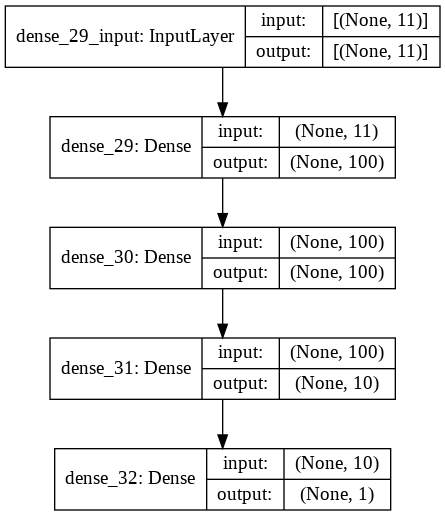

In [43]:
# Graphically check the model summary
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_5_model, show_shapes=True, show_layer_names=True)

In [44]:
# Prediction
y_5_pred = insurance_5_model.predict(X_5_test)

In [47]:
# Check the mean absolute error
mae5 = tf.keras.metrics.mean_absolute_error(y_5_test, tf.squeeze(y_5_pred))

# Check the mean sqared error
mse5 = tf.keras.metrics.mean_squared_error(y_5_test, tf.squeeze(y_5_pred))

mae5.numpy(), mse5.numpy()

(3669.3071, 54253316.0)

Text(0, 0.5, 'Loss')

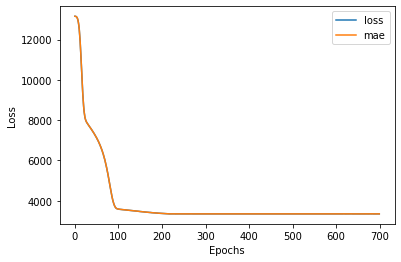

In [48]:
# Visualize the history of the training the loss curve
pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")